In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

In [2]:
# Dataset paths
first_set_path = r'F:/Image_Dataset/Dataset/First Set'
second_set_path = r'F:/Image_Dataset/Dataset/Second Set'

# Image categories
categories = ['Normal', 'OSCC']

In [4]:
def load_images_from_folder(folder_path, img_size=(224, 224)):
    images = []
    labels = []
    for category in categories:
        path = os.path.join(folder_path, category)
        for img_name in os.listdir(path):
            img_path = os.path.join(path, img_name)
            img = load_img(img_path, target_size=img_size)
            img_array = img_to_array(img) / 255.0
            images.append(img_array)
            if category == 'Normal':
                labels.append(0) 
            else:
                labels.append(1)
            
    return np.array(images), np.array(labels)

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define an ImageDataGenerator with augmentation

# datagen = ImageDataGenerator(
#     rescale=1.0/255.0,   # Normalize pixel values
#     rotation_range=20,   # Randomly rotate images
#     width_shift_range=0.2,  # Randomly shift images horizontally
#     height_shift_range=0.2,  # Randomly shift images vertically
#     shear_range=0.15,    # Shear transformation
#     zoom_range=0.2,      # Random zoom
#     horizontal_flip=True,  # Flip images horizontally
#     fill_mode='nearest'  # Fill pixels that go out of bounds
# )


datagen = ImageDataGenerator(
    rotation_range=10,     # Reduce rotation range
    width_shift_range=0.1,  # Reduce shift
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)


In [6]:
# Load 100x images
x_100x, y_100x = load_images_from_folder(first_set_path)

# Load 400x images
x_400x, y_400x = load_images_from_folder(second_set_path)

# Combine the datasets
x_data = np.concatenate((x_100x, x_400x), axis=0)
y_data = np.concatenate((y_100x, y_400x), axis=0)

# Shuffle the dataset
from sklearn.utils import shuffle
x_data, y_data = shuffle(x_data, y_data, random_state=42)

In [7]:
print(len(x_100x), len(y_100x), len(x_400x), len(y_400x))

522 522 696 696


In [13]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

In [9]:
# Augment the training set
train_datagen = datagen.flow(x_train, y_train, batch_size=32)

In [15]:
from tensorflow.keras.layers import BatchNormalization

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),
    
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),
    
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    BatchNormalization(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Compile the model
# model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,170,497 (42.61 MB)

 Trainable params: 11,169,793 (42.61 MB)

 Non-trainable params: 704 (2.75 KB)

In [29]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

# Load pre-trained EfficientNet
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

# Create final model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


In [16]:
# Train the model with augmented data
# history = model.fit(train_datagen, validation_data=(x_test, y_test), epochs=10)
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)


Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 32s 984ms/step - accuracy: 0.6082 - loss: 0.7545 - val_accuracy: 0.2377 - val_loss: 28.0316
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 30s 971ms/step - accuracy: 0.7399 - loss: 0.5682 - val_accuracy: 0.2377 - val_loss: 20.7395
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 30s 970ms/step - accuracy: 0.7229 - loss: 0.5409 - val_accuracy: 0.2582 - val_loss: 12.3953
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 30s 980ms/step - accuracy: 0.7519 - loss: 0.5090 - val_accuracy: 0.2377 - val_loss: 5.4757
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 30s 966ms/step - accuracy: 0.7775 - loss: 0.4910 - val_accuracy: 0.2377 - val_loss: 2.5640
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 30s 977ms/step - accuracy: 0.8124 - loss: 0.4263 - val_accuracy: 0.2377 - val_loss: 1.5569
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 30s 981ms/step - accuracy: 0.8269 - loss: 0.3948 - val_accuracy: 0.2377 - val_loss: 1.3350
Epoch 8/10
13/31 ━━━━━━━━━━━━━━━━━━━━ 17s 977ms/step - accuracy: 0.8407 - loss: 0.3579

KeyboardInterrupt: 

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step


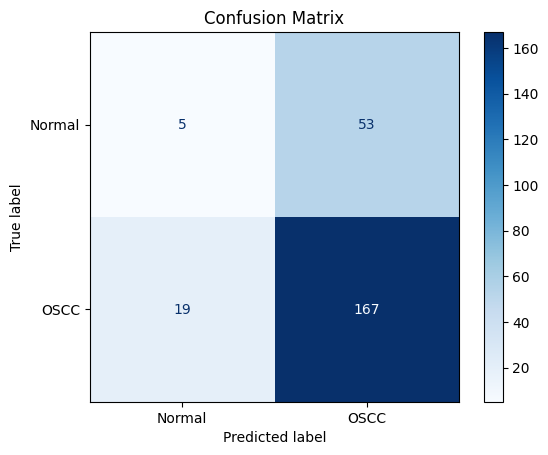

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Get model predictions
y_pred_prob = model.predict(x_test)  # Probabilities
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert to binary predictions

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "OSCC"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [18]:
print(cm)

[[110   0]
 [ 56  78]]


In [11]:
#history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=32)

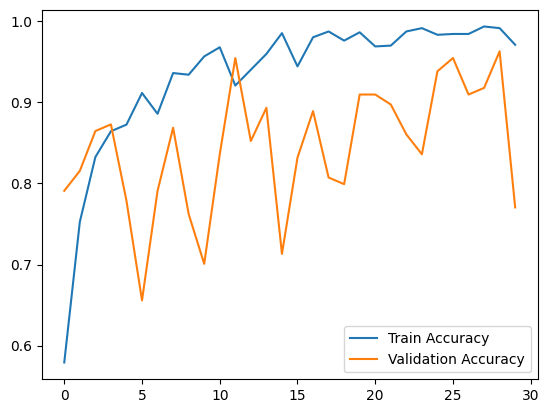

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.8013 - loss: 1.2605
Test Accuracy: 77.05%


In [12]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

# Evaluate the model on test data
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

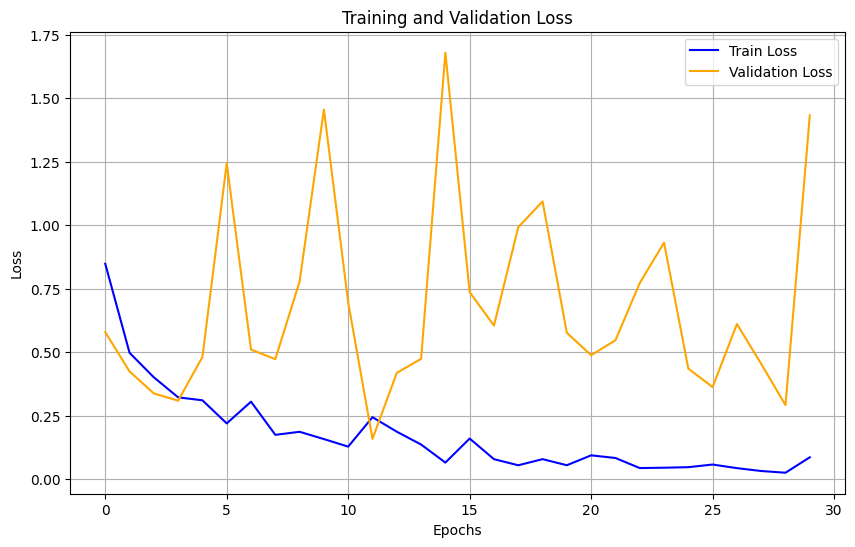

In [13]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
model.save("basicCNN_model.keras")

In [15]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model("basicCNN_model.keras")

# Print the model summary to verify
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,507,269 (127.82 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,338,180 (85.21 MB)

In [15]:
def predict_image(image_path, model):
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    
    prediction = model.predict(img_array)
    print(prediction[0])
    if prediction[0] > 0.5:
        print("Prediction: OSCC")
    else:
        print("Prediction: Normal")
        
predict_image(r'F:/Image_Dataset/Dataset/First Set/Normal/Normal_100x_1.jpg', model)

predict_image(r'OSCC_100x_54.jpg', model)
predict_image(r'OSCC_100x_75.jpg', model)
predict_image(r'OSCC_100x_98.jpg', model)
predict_image(r'OSCC_100x_105.jpg', model)
predict_image(r'OSCC_100x_112.jpg', model)
predict_image(r'OSCC_100x_169.jpg', model)

predict_image(r'F:/Image_Dataset/Dataset/Second Set/Normal/Normal_400x_1.jpg', model)
# predict_image(r'F:/Image_Dataset/Dataset/Second Set/OSCC/OSCC_400x_23.jpg', model)     
        

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[0.5177397]
Prediction: OSCC
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[0.9803888]
Prediction: OSCC
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[0.9859051]
Prediction: OSCC
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[0.5998329]
Prediction: OSCC
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[0.9425344]
Prediction: OSCC
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[0.97139233]
Prediction: OSCC
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[0.9930202]
Prediction: OSCC
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[0.4764361]
Prediction: Normal


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step


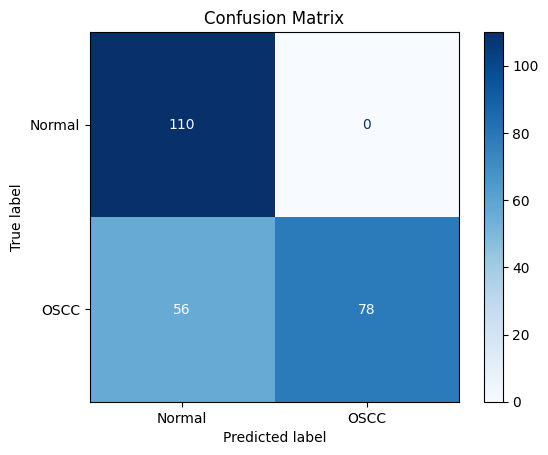

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Get model predictions
y_pred_prob = model.predict(x_test)  # Probabilities
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert to binary predictions

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "OSCC"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

